In [379]:
import nltk
import re
from urllib.request import urlopen
from nltk.corpus import stopwords
import random
import heapq
import numpy as np
import pandas as pd
import collections 



nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
book1="https://www.gutenberg.org/files/832/832-0.txt"
book2="https://www.gutenberg.org/cache/epub/10148/pg10148.txt"
book3="https://www.gutenberg.org/files/2892/2892-0.txt"
book4="https://www.gutenberg.org/cache/epub/10662/pg10662.txt"
book5="https://www.gutenberg.org/files/1251/1251-0.txt"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [380]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text


In [381]:
def data_partition(Url,label):
  raw=urlopen(Url).read()
  raw=raw.decode()
  raw=re.split('\s',raw)
  partition=[]
  j=5000
  for i in range(200):#partitioning the book into 200 parts
    partition.append(raw[j:j+100])
    j+=100
  labeled=[(doc,label) for doc in partition]
  return labeled

Labeled_Book1=data_partition(book1,"J. Walker McSpadden")
Labeled_Book2=data_partition(book2,"Howard Pyle")
Labeled_Book3=data_partition(book3,"James Stephens")
Labeled_Book4=data_partition(book4,"William Hope Hodgson")
Labeled_Book5=data_partition(book5,"Thomas Malory")
target_names=["J. Walker McSpadden","Howard Pyle","James Stephens","William Hope Hodgson","Thomas Malory"]



In [382]:
Corpus=[]
#put all seperate partition into one corpus
for item in Labeled_Book1:
  Corpus.append(item)
for item in Labeled_Book2:
  Corpus.append(item)
for item in Labeled_Book3:
  Corpus.append(item)
for item in Labeled_Book4:
  Corpus.append(item)
for item in Labeled_Book5:
  Corpus.append(item)
#shuffle the corpus
random.shuffle(Corpus)
print(Corpus)

[(['upon', 'his', 'silver', 'horn;', 'who', 'thereupon', 'sounded', 'three', 'blasts', 'that', 'came', '', 'echoing', 'cheerily', 'back', 'from', 'the', 'gray', 'walls', 'of', 'Nottingham.', '', 'Then', 'the', '', 'archers', 'stepped', 'forth', 'to', 'their', 'places,', 'while', 'all', 'the', 'folks', 'shouted', 'with', '', 'a', 'mighty', 'voice,', 'each', 'man', 'calling', 'upon', 'his', 'favorite', 'yeoman.', '', '"Red', 'Cap!"', '', 'cried', 'some;', '"Cruikshank!"', 'cried', 'others;', '"Hey', 'for', 'William', "o'", 'Leslie!"', '', 'shouted', 'others', 'yet', 'again;', 'while', 'ladies', 'waved', 'silken', 'scarfs', 'to', 'urge', 'each', '', 'yeoman', 'to', 'do', 'his', 'best.', '', '', '', 'Then', 'the', 'herald', 'stood', 'forth', 'and', 'loudly', 'proclaimed', 'the', 'rules', 'of', 'the', 'game', '', 'as', 'follows:'], 'Howard Pyle'), (['', '', 'Then', 'when', 'the', 'feast', 'was', 'done', 'Will', 'Stutely', 'spoke', 'up.', '', '"It', 'is', 'now', 'time,', 'I', '', 'ween,', 't

In [383]:
df = pd.DataFrame(Corpus)
df.columns=['dict','label']
df['dict_clean']=df['dict'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))# remove all puntuation and lemmatization (utils_preprocess_text function is taken from featureengineering.ipynb provided by professor Arya Rahgozar)
#set 70% of the corpus as trainging set and 30% of the corpus as test case
train_set=df['dict_clean'].loc[0:len(df)*0.7-1].values
test_set=df['dict_clean'].loc[len(df)*0.7:len(df)].values
train_label=df['label'].loc[0:len(df)*0.7-1].values
test_label=df['label'].loc[len(df)*0.7:len(df)].values

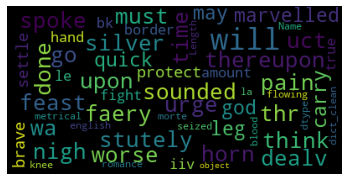

In [384]:
#Corpus Visualizations
import wordcloud
from matplotlib import pyplot as plt
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(df['dict_clean']))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [385]:
#trasformation to BOW model
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_set)
X_train_counts.shape


(700, 5772)

In [386]:
# transform to TF-IDF model
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(700, 5772)

In [387]:
#same transformation for test sets
X_test_counts = count_vect.transform(test_set)
X_test_counts.shape
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(300, 5772)

In [388]:
# Naive_Bayes trainging and testing 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,train_label)

predicted = clf.predict(X_test_tfidf)
np.mean(predicted == test_label)

0.93

In [389]:
#cross validation testing for SVM, decisition tree and KNeighbor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
neigh_clf=KNeighborsClassifier(3)
svm_clf = svm.SVC(kernel='linear', C=2)
tree_clf=tree.DecisionTreeClassifier()
#neigh_clf.fit(X_train_tfidf,train_label)
tree_scores = cross_val_score(tree_clf,X_test_tfidf,test_label, cv=50)
svm_scores = cross_val_score(svm_clf,X_test_tfidf,test_label, cv=10)
neigh_scores = cross_val_score(neigh_clf,X_test_tfidf,test_label, cv=10)
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("K Heighbors Accuracy: %0.2f (+/- %0.2f)" % (neigh_scores.mean(), neigh_scores.std() * 2))
#predict=neigh_clf.predict(X_train_tfidf)
#print(np.mean(predicted == test_label))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 48 members, which is less than n_splits=50.
  UserWarning,


SVM Accuracy: 0.96 (+/- 0.08)
Decision Tree Accuracy: 0.66 (+/- 0.41)
K Heighbors Accuracy: 0.86 (+/- 0.10)


In [390]:
#pipline creation attemption
from sklearn.pipeline import Pipeline
NB_text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
NB_text_clf.fit(train_set, train_label)

predicted=NB_text_clf.predict(test_set)
np.mean(predicted == test_label)


0.93

In [391]:
#SVM
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3,random_state=32)),
])
text_clf.fit(train_set, train_label)
predicted=text_clf.predict(test_set)
np.mean(predicted == test_label)

0.9633333333333334

In [392]:
# creating pipeline for SVM, decisition tree and KNeighbor for k-fold test
tree_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', tree.DecisionTreeClassifier()),
])
tree_clf.fit(train_set, train_label)
svm_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(kernel='linear', C=2)),
])
svm_clf.fit(train_set, train_label)
neigh_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(3)),
])
neigh_clf.fit(train_set, train_label)




Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

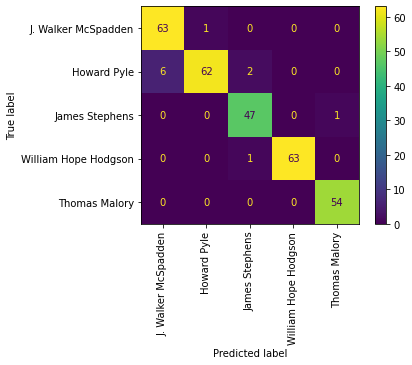

In [393]:
#SVM result Visualizations
metrics.ConfusionMatrixDisplay.from_estimator(
    text_clf,test_set,test_label, display_labels=target_names, xticks_rotation="vertical"
)

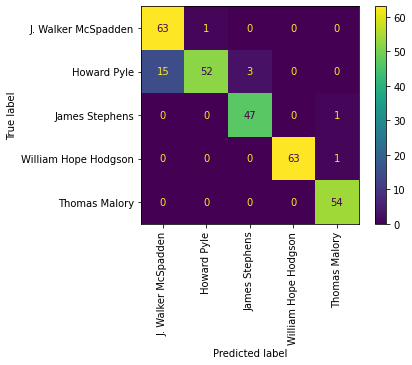

In [394]:
#Naive Bayes result Visualizations
metrics.ConfusionMatrixDisplay.from_estimator(
    NB_text_clf,test_set,test_label, display_labels=target_names, xticks_rotation="vertical"
)

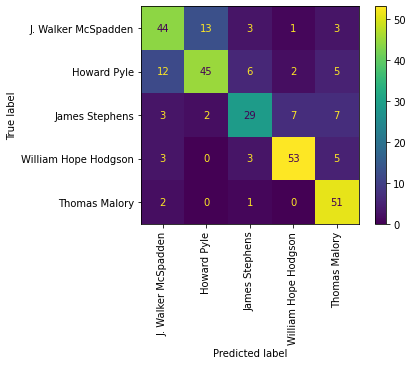

In [395]:
#Decision Tree result Visualizations
metrics.ConfusionMatrixDisplay.from_estimator(
    tree_clf,test_set,test_label, display_labels=target_names, xticks_rotation="vertical"
)

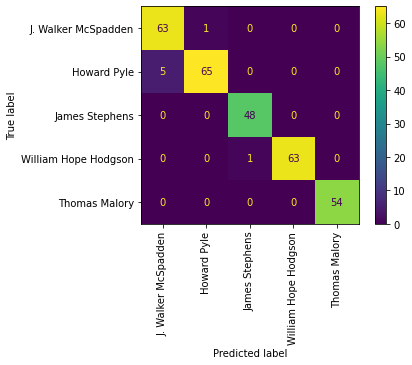

In [396]:
#SVM linear result Visualizations
metrics.ConfusionMatrixDisplay.from_estimator(
    svm_clf,test_set,test_label, display_labels=target_names, xticks_rotation="vertical"
)

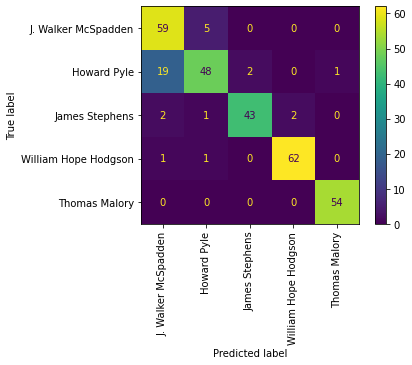

In [397]:
#kheighbor result Visualizations
metrics.ConfusionMatrixDisplay.from_estimator(
    neigh_clf,test_set,test_label, display_labels=target_names, xticks_rotation="vertical"
)

In [398]:
#10 fold cross-validation  
from sklearn.model_selection import KFold
from sklearn import metrics
kfold = KFold(n_splits=10, shuffle=False)
for train, test in kfold.split(df):
     #print("%s %s" % (train, test))
     kfold_train_set=df['dict_clean'].loc[train]
     kfold_test_set=df['dict_clean'].loc[test]
     kfold_train_target=df['label'].loc[train]
     kfold_test_target=df['label'].loc[test]
     NB_text_clf.fit(kfold_train_set, kfold_train_target)
     text_clf.fit(kfold_train_set, kfold_train_target)
     tree_clf.fit(kfold_train_set, kfold_train_target)
     svm_clf.fit(kfold_train_set, kfold_train_target)
     neigh_clf.fit(kfold_train_set, kfold_train_target)
     #model prediction used for classification report generation 
     predicted_NB=NB_text_clf.predict(kfold_test_set)
     predicted_SGD=text_clf.predict(kfold_test_set)
     predicted_SVM=svm_clf.predict(kfold_test_set)
     predicted_tree=tree_clf.predict(kfold_test_set)
     predicted_neigh=neigh_clf.predict(kfold_test_set)
     print('------------------------SGD Result---------------------------')
     print(metrics.classification_report(kfold_test_target, predicted_SGD))
     print('------------------------Naive Bayes Result------------------')
     print(metrics.classification_report(kfold_test_target, predicted_NB))
     print('------------------------SVM Result---------------------------')
     print(metrics.classification_report(kfold_test_target, predicted_SVM))
     print('------------------------Decision Tree Result------------------')
     print(metrics.classification_report(kfold_test_target, predicted_tree))
     print('------------------------KNeighbors Result------------------')
     print(metrics.classification_report(kfold_test_target, predicted_neigh))
     print('------------------------Cross Validation---------------------------')
     scores = cross_val_score(text_clf,kfold_test_set,kfold_test_target, cv=10)
     NB_scores =cross_val_score(NB_text_clf,kfold_test_set,kfold_test_target, cv=10)
     tree_scores = cross_val_score(tree_clf,kfold_test_set,kfold_test_target, cv=10)
     svm_scores = cross_val_score(svm_clf,kfold_test_set,kfold_test_target, cv=10)
     neigh_scores = cross_val_score(neigh_clf,kfold_test_set,kfold_test_target, cv=10)
     print("SGD Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
     print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (NB_scores.mean(), NB_scores.std() * 2))
     print("SVM Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
     print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
     print("K Heighbors Accuracy: %0.2f (+/- %0.2f)" % (neigh_scores.mean(), neigh_scores.std() * 2))

------------------------SGD Result---------------------------
                      precision    recall  f1-score   support

         Howard Pyle       0.91      1.00      0.95        20
 J. Walker McSpadden       1.00      0.82      0.90        17
      James Stephens       1.00      1.00      1.00        24
       Thomas Malory       1.00      1.00      1.00        13
William Hope Hodgson       0.96      1.00      0.98        26

            accuracy                           0.97       100
           macro avg       0.97      0.96      0.97       100
        weighted avg       0.97      0.97      0.97       100

------------------------Naive Bayes Result------------------
                      precision    recall  f1-score   support

         Howard Pyle       0.91      1.00      0.95        20
 J. Walker McSpadden       1.00      0.82      0.90        17
      James Stephens       1.00      0.96      0.98        24
       Thomas Malory       1.00      1.00      1.00        13
Willi